In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Loading Train Dataset

In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Checking Shape

In [3]:
df.shape

(42000, 785)

## Splitting Image Pixels and Labels with Reshaping

In [4]:
X_train = df.iloc[:, 1:]
y_train = df.iloc[:, :1]

X_train = np.array(X_train).reshape(-1, 28, 28)
y_train = np.array(y_train).reshape(-1)

print(X_train.shape)
y_train.shape

(42000, 28, 28)


(42000,)

## Plotting Random Images from 28X28 Pixels

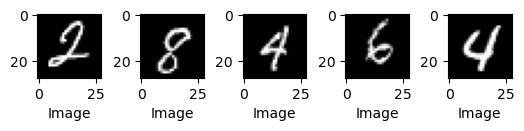

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(0, 5):
  slot = i + 1
  size = '55'
  s_plot = int(f'{size}{slot}')
  plt.subplot(s_plot)
  r_number = np.random.randint(0, len(X_train))
  plt.xlabel('Image')
  plt.imshow(X_train[r_number], cmap=plt.get_cmap('gray'))

## Rescaling Pixel Range of Train Data Between 0, 1

In [6]:
n_samples = X_train.shape[0]
X_rows = X_train[0].shape[0]
X_cols = X_train[0].shape[1]
X_train = X_train.reshape(n_samples, X_rows, X_cols, 1)

X_train = X_train.astype('float32')

X_train /= 255

print(X_train.shape)
# print(X_train[0])

(42000, 28, 28, 1)


In [7]:
from tensorflow import keras
from keras.utils import np_utils

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Hot Encoding Labels

In [8]:
y_train = np_utils.to_categorical(y_train)

In [9]:
print(y_train[:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Importing Keras

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model
from keras.optimizers import SGD

## Creating CNN (Convolutional Neural Network)

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

## Loading Test Data

In [12]:
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
X_test = np.array(df_test).reshape(-1, 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

## Converting Pixel Range of Test Data Between 0, 1

In [13]:
X_test = X_test.astype('float32')

X_test /= 255

In [14]:
X_test.shape

(28000, 28, 28, 1)

In [15]:
# batch_size = 12
# epochs = 1

# steps = int(X_train.shape[0] / batch_size)

# history = model.fit(X_train, y_train, epochs=epochs, steps_per_epoch=steps)

## Training Model

In [16]:
batch_size = 16
epochs = 15

steps = int(X_train.shape[0] / batch_size)

history = model.fit(X_train, y_train, epochs=epochs, steps_per_epoch=steps)

Epoch 1/15


2023-06-24 15:42:25.390943: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2625/2625 [==============================] - 17s 3ms/step - loss: 0.5555 - accuracy: 0.8268
Epoch 2/15
2625/2625 [==============================] - 8s 3ms/step - loss: 0.2526 - accuracy: 0.9250
Epoch 3/15
2625/2625 [==============================] - 8s 3ms/step - loss: 0.1684 - accuracy: 0.9496
Epoch 4/15
2625/2625 [==============================] - 9s 3ms/step - loss: 0.1286 - accuracy: 0.9614
Epoch 5/15
2625/2625 [==============================] - 9s 3ms/step - loss: 0.1069 - accuracy: 0.9675
Epoch 6/15
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0956 - accuracy: 0.9714
Epoch 7/15
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0840 - accuracy: 0.9746
Epoch 8/15
2625/2625 [==============================] - 9s 3ms/step - loss: 0.0739 - accuracy: 0.9777
Epoch 9/15
2625/2625 [==============================] - 9s 3ms/step - loss: 0.0681 - accuracy: 0.9788
Epoch 10/15
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0656 - accura

## Displaying Train Loss and Train Accuracy

In [17]:
print(f"Train Loss: {round(round(history.history['loss'][9], 4) * 100, 2)}%")
print(f"Train Accuracy: {round(round(history.history['accuracy'][9], 4) * 100, 2)}%")

Train Loss: 6.56%
Train Accuracy: 97.96%


## Making Predictions with Test Data

In [18]:
prediction = model.predict(X_test)

875/875 [==============================] - 2s 2ms/step


In [19]:
# prediction

## Matching Random Image with Labels

array([16894., 14954., 13421., 18413., 22325.,  8813., 18172., 20016.,
       14001., 14088., 10017., 20610.,  9625.,  5208.,  6766., 13165.,
       24607., 17821., 17500.,  6887.])

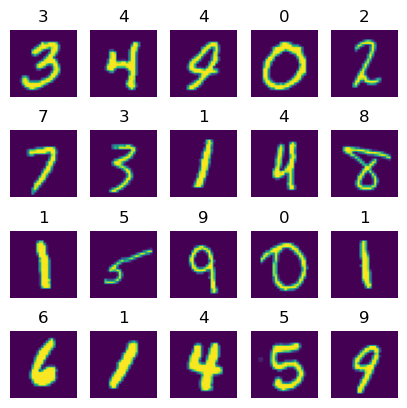

In [20]:
figure, axes = plt.subplots(4, 5, figsize=(5, 5))
axes = axes.ravel()
indexes = np.zeros(20)

for i in range(20):
    r_number = np.random.randint(0, X_test.shape[0])
    indexes[i] = r_number
    axes[i].imshow(X_test[r_number])
    axes[i].set_title(np.argmax(prediction[r_number]))
    axes[i].axis("off")

indexes

## Plotting Loss/Accuracy Change Per Epochs

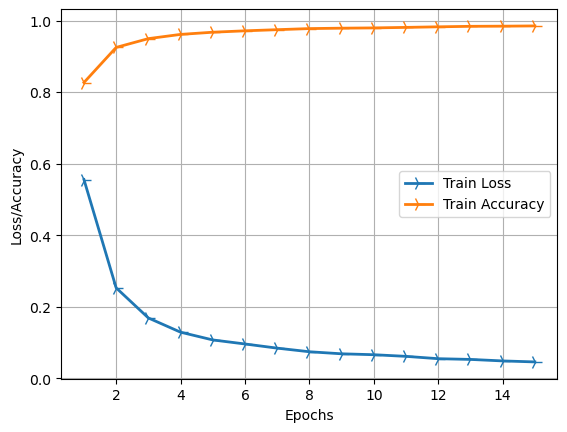

In [21]:
# print(f"{history.history}\n")

loss_values = history.history['loss']
acc_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

loss_line = plt.plot(epochs, loss_values, label="Train Loss")
acc_line = plt.plot(epochs, acc_values, label="Train Accuracy")

plt.setp(loss_line, linewidth=2.0, marker='4', markersize=10.0)
plt.setp(acc_line, linewidth=2.0, marker='4', markersize=10.0)

plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')

plt.grid(True)
plt.legend()

plt.show()

## Plotting Model Diagram

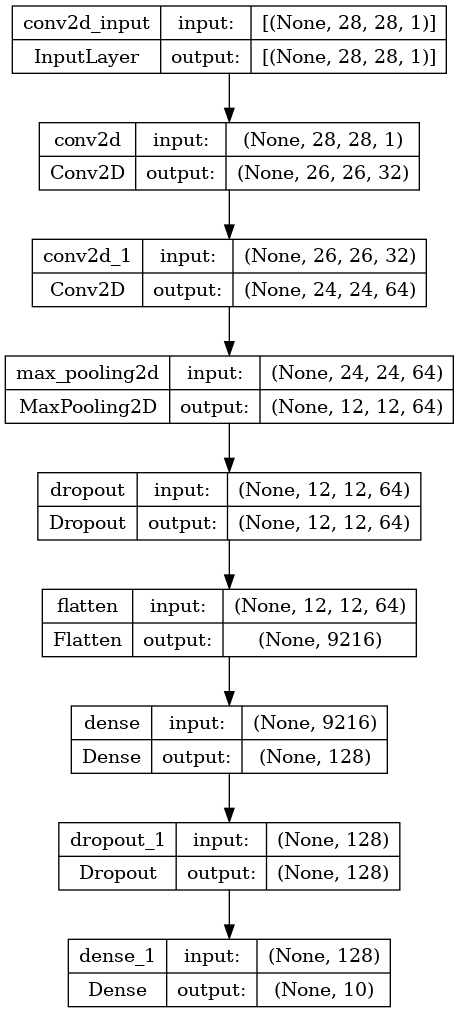

In [22]:
p_model = plot_model(model, show_shapes=True, show_layer_names=True)
p_model
# plt.figure(figsize=(30, 15))

# plt.imshow(p_model)

## Creating Dataframe for Submission

In [23]:
pred_label = [np.argmax(data) for data in prediction]
pred_id = range(1, len(pred_label) + 1)

pred = pd.DataFrame({
    "ImageId": pred_id,
    "Label": pred_label
})
# pred.head(15)

## Submitting Prediction DataFrame

In [24]:
pred.to_csv('submission.csv', index=False)